# Problem 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
X = pd.DataFrame(data = iris['data'], columns=iris['feature_names'])
X = X[['sepal length (cm)','petal length (cm)']]
Y = pd.DataFrame(data = iris['target'], columns=['Species'])
data = pd.concat([X,Y],axis = 1)
data.drop(data[data['Species'] == 0].index, inplace=True)
data.head()

,sepal length (cm),petal length (cm),Species
50,7.0,4.7,1
51,6.4,4.5,1
52,6.9,4.9,1
53,5.5,4.0,1
54,6.5,4.6,1


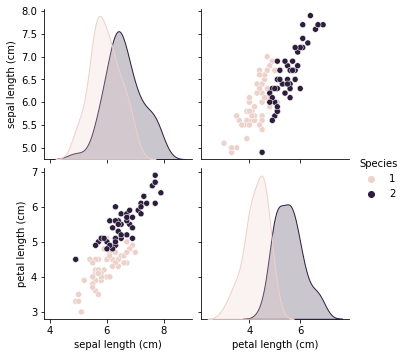

In [3]:
# Scatter plot matrix
sns.pairplot(data=data,hue='Species')

# Problem 2

<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal length (cm)'>

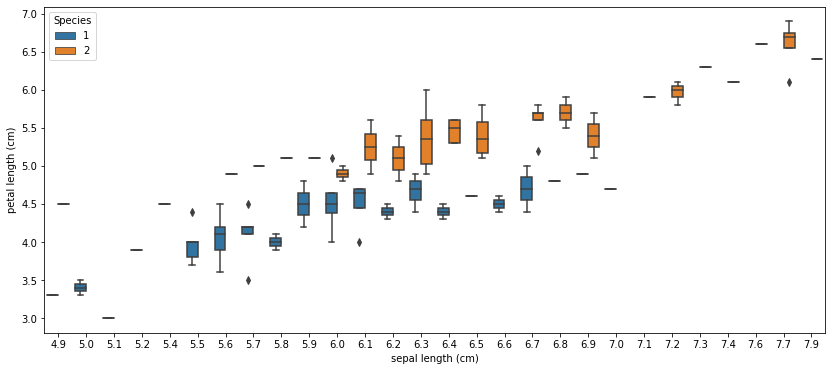

In [4]:
# Display boxplot
plt.figure(figsize=(14,6))
sns.boxplot(data=data,x='sepal length (cm)',y='petal length (cm)',hue='Species')

<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal length (cm)'>

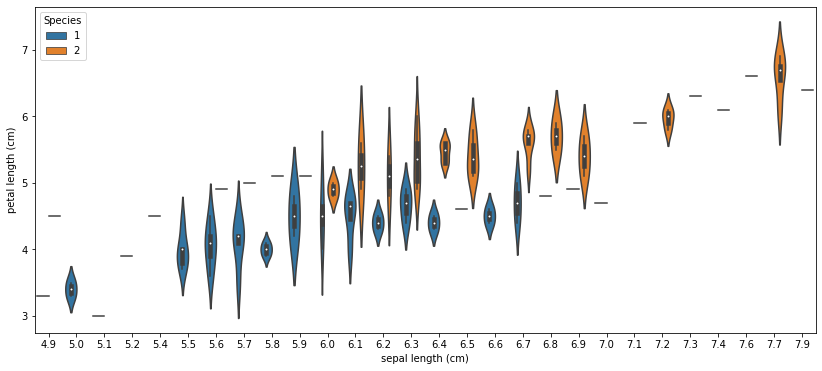

In [5]:
# Dislay violin plot
plt.figure(figsize=(14,6))
sns.violinplot(data=data,x='sepal length (cm)',y='petal length (cm)',hue='Species')

From the figures plotted above and in last week PreClass Assignment 1, it is observable that a strong relationship holds between sepal length and petal length. The value of two feature of both species are quite diffenrent in their distribution. Generally, a virgicolor flower tends to have bigger petal length and sepal length than a virginica. However, there is a value range in which it is difficult to differentiate between them. When sepal length is from 6.0 and 6.7 cm and petal length is from 4.5 cm to 6.5 cm, the distribution of two species bear some similarities and it is not easy to classify one instance with particular petal length and sepal length falling within that range.

# Problem 3

In [6]:
from sklearn.model_selection import train_test_split

# Transforming panda Dataframe to numpy array

X, y = data.iloc[:,0:2], data['Species']
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

In [7]:
x_train

,sepal length (cm),petal length (cm)
116,6.5,5.5
79,5.7,3.5
134,6.1,5.6
59,5.2,3.9
92,5.8,4.0
...,...,...
62,6.0,4.0
145,6.7,5.2
131,7.9,6.4
132,6.4,5.6


In [8]:
x_test

,sepal length (cm),petal length (cm)
98,5.1,3.0
139,6.9,5.4
120,6.9,5.7
115,6.4,5.3
77,6.7,5.0
144,6.7,5.7
133,6.3,5.1
75,6.6,4.4
126,6.2,4.8
112,6.8,5.5


In [9]:
y_train

116    2
79     1
134    2
59     1
92     1
      ..
62     1
145    2
131    2
132    2
80     1
Name: Species, Length: 75, dtype: int64

In [10]:
y_test

98     1
139    2
120    2
115    2
77     1
144    2
133    2
75     1
126    2
112    2
111    2
101    2
128    2
71     1
82     1
125    2
83     1
56     1
53     1
65     1
117    2
107    2
97     1
102    2
93     1
Name: Species, dtype: int64

# Problem 4

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit the training data
scaler.fit(x_train)
# Transform the training and testing data
x_test = scaler.transform(x_test)
x_train = scaler.transform(x_train)

In [12]:
x_test

array([[-1.68827233, -2.36366647],
       [ 1.03800476,  0.65164157],
       [ 1.03800476,  1.02855508],
       [ 0.28070557,  0.52600374],
       [ 0.73508508,  0.14909023],
       [ 0.73508508,  1.02855508],
       [ 0.12924573,  0.27472807],
       [ 0.58362524, -0.60473678],
       [-0.02221411, -0.10218544],
       [ 0.88654492,  0.77727941],
       [ 0.28070557,  0.52600374],
       [-0.62805346,  0.27472807],
       [ 0.28070557,  0.90291724],
       [-0.17367395, -1.10728812],
       [-0.62805346, -1.23292596],
       [ 1.49238427,  1.40546858],
       [-0.32513379,  0.27472807],
       [ 0.12924573, -0.22782327],
       [-1.08243298, -1.10728812],
       [ 0.73508508, -0.60473678],
       [ 2.24968346,  2.28493343],
       [ 1.64384411,  1.78238209],
       [-0.02221411, -0.73037461],
       [ 1.34092443,  1.27983075],
       [-1.83973217, -1.98675297]])

In [13]:
x_train

array([[ 0.4321654 ,  0.77727941],
       [-0.7795133 , -1.7354773 ],
       [-0.17367395,  0.90291724],
       [-1.53681249, -1.23292596],
       [-0.62805346, -1.10728812],
       [ 0.73508508,  1.02855508],
       [ 0.28070557,  0.77727941],
       [-0.93097314, -0.85601245],
       [-0.7795133 , -0.47909894],
       [-0.17367395, -0.35346111],
       [-0.62805346,  0.27472807],
       [-1.23389281, -0.47909894],
       [ 0.28070557, -0.73037461],
       [-0.93097314, -0.98165028],
       [ 0.12924573,  0.0234524 ],
       [ 0.4321654 ,  1.15419291],
       [-0.47659362, -0.85601245],
       [-0.32513379,  0.14909023],
       [ 0.12924573,  1.40546858],
       [ 0.12924573,  0.90291724],
       [ 0.28070557, -0.47909894],
       [-0.62805346, -0.98165028],
       [-0.32513379, -0.10218544],
       [-1.08243298, -1.10728812],
       [ 0.58362524, -0.35346111],
       [ 0.4321654 ,  0.4003659 ],
       [-0.17367395, -0.22782327],
       [-0.17367395,  0.0234524 ],
       [ 0.88654492,

# Problem 5

In [14]:
from sklearn.neighbors import KNeighborsClassifier
# Default case
default_knc = KNeighborsClassifier()
default_knc.fit(x_train,y_train)
print('Predicted value with k-nn with n = 5 is {}'.format(default_knc.predict([x_test[10]])))
# 3-nn case
three_knc = KNeighborsClassifier(n_neighbors=3)
three_knc.fit(x_train,y_train)
print('Predicted value with k-nn with n = 3 is {}'.format(three_knc.predict([x_test[10]])))
# 1-nn case
one_knc = KNeighborsClassifier(n_neighbors=1)
one_knc.fit(x_train,y_train)
print('Predicted value with k-nn with n = 1 is {}'.format(one_knc.predict([x_test[10]])))

Predicted value with k-nn with n = 5 is [2]
Predicted value with k-nn with n = 3 is [2]
Predicted value with k-nn with n = 1 is [2]


# Problem 6

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def evaluate(y_true, y_pred):
    # Calculate and display the four types of indicators
    print('Accuracy score: {}'.format(accuracy_score(y_true,y_pred)))
    print('Precision score: {}'.format(precision_score(y_true,y_pred)))
    print('Recall score: {}'.format(recall_score(y_true,y_pred)))
    print('F1 score: {}'.format(f1_score(y_true,y_pred)))
    print('Confusion Matrix:\n{}'.format(confusion_matrix(y_true,y_pred)))

In [16]:
# Default case evaluation
evaluate(y_test,default_knc.predict(x_test))

Accuracy score: 0.88
Precision score: 0.9
Recall score: 0.8181818181818182
F1 score: 0.8571428571428572
Confusion Matrix:
[[ 9  2]
 [ 1 13]]


In [17]:
# 3-nn case evaluation
evaluate(y_test,three_knc.predict(x_test))

Accuracy score: 0.92
Precision score: 0.9090909090909091
Recall score: 0.9090909090909091
F1 score: 0.9090909090909091
Confusion Matrix:
[[10  1]
 [ 1 13]]


In [18]:
# 1-nn case evaluation
evaluate(y_test,one_knc.predict(x_test))

Accuracy score: 0.88
Precision score: 1.0
Recall score: 0.7272727272727273
F1 score: 0.8421052631578948
Confusion Matrix:
[[ 8  3]
 [ 0 14]]


After doing some research, I have come up with following summary of the four types of index values:
 - **Accuracy score**: a ratio of correctly predicted observation to the total observations. Accuracy is a great measure but only when you have symmetric datasets where values of false positive and false negatives are almost same.
 - **Precision score**: a ratio of correctly predicted positive observations to the total predicted positive observations. This relates to the low false positive rate.
 - **Recall score**: a ratio of correctly predicted positive observations to the all observations in actual class - yes
 - **F1 score**: the weighted average of Precision and Recall

# Problem 7

In [19]:
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    Draw the determination area of the model that learned binary classification with two-dimensional features.
    The background color is drawn from the estimated values of the trained model.
    The points on the scatter plot are training or validation data.
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        Feature value
    y : ndarray, shape(n_samples,)
        label
    model : object
        Insert the installed model of the learned model
    step : float, (default : 0.1)
        Set the interval to calculate the estimate
    title : str
        Give the text of the graph Title
    xlabel, ylabel : str
        Give the text of the axis label
    target_names= : list of str
        Give a list of legends
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

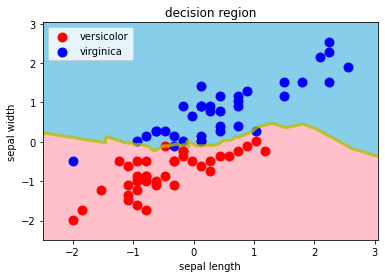

In [20]:
decision_region(x_train,y_train,default_knc,xlabel='sepal length',ylabel='sepal width')

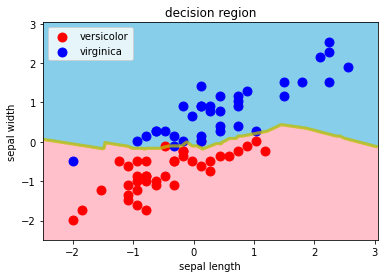

In [21]:
decision_region(x_train,y_train,three_knc,xlabel='sepal length',ylabel='sepal width')

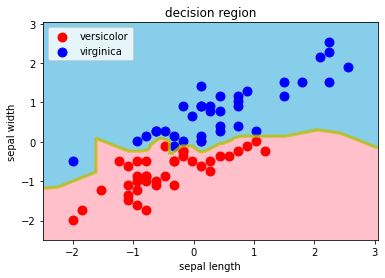

In [22]:
decision_region(x_train,y_train,one_knc,xlabel='sepal length',ylabel='sepal width')

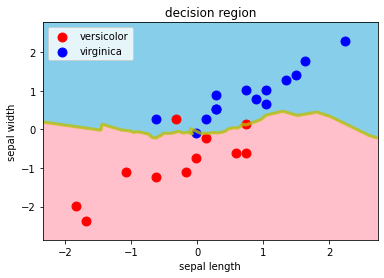

In [23]:
# Plot the testing data with default k-nn (n = 5)
decision_region(x_test,y_test,default_knc,xlabel='sepal length',ylabel='sepal width')

# Problem 8

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [25]:
def calculateScore(model, x_train, y_train, x_test, y_test):
    # Training the model
    model.fit(x_train,y_train)
    # Predict the model
    y_pred = model.predict(x_test)
    result = np.array([accuracy_score(y_test,y_pred), precision_score(y_test,y_pred),
                       recall_score(y_test,y_pred), f1_score(y_test,y_pred)])
    return result

columns = ['Accuracy Score','Precision Score', 'Recall Score', 'F1 Score']

In [26]:
scores = pd.DataFrame(columns=columns, data=[
    calculateScore(KNeighborsClassifier(),x_train, y_train, x_test, y_test),
    calculateScore(LogisticRegression(), x_train, y_train, x_test, y_test),
    calculateScore(SVC(), x_train, y_train, x_test, y_test),
    calculateScore(DecisionTreeClassifier(), x_train, y_train, x_test, y_test),
    calculateScore(RandomForestClassifier(), x_train, y_train, x_test, y_test)
],index=['Nearest neighbor','Logistic Regression','SVM','Decision Tree','Random Forest'])
print(scores[:])

                     Accuracy Score  Precision Score  Recall Score  F1 Score
Nearest neighbor               0.88              0.9      0.818182  0.857143
Logistic Regression            0.88              0.9      0.818182  0.857143
SVM                            0.88              0.9      0.818182  0.857143
Decision Tree                  0.92              1.0      0.818182  0.900000
Random Forest                  0.92              1.0      0.818182  0.900000


With the default parameters, apart from the same recall score, decision tree and random forest have higher values in accuracy, precision and F1 than the others.

**Visualization**

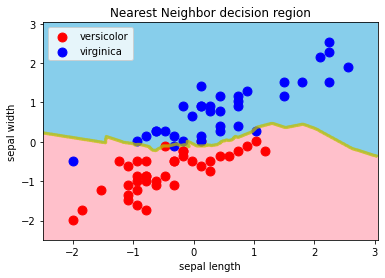

In [27]:
decision_region(x_train,y_train,
                KNeighborsClassifier().fit(x_train,y_train),
                xlabel='sepal length',ylabel='sepal width', title='Nearest Neighbor decision region')

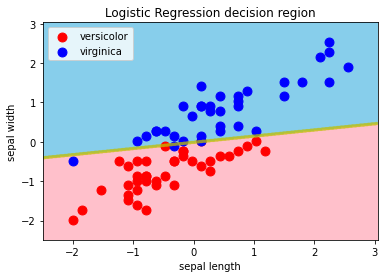

In [28]:
decision_region(x_train,y_train,
                LogisticRegression().fit(x_train,y_train),
                xlabel='sepal length',ylabel='sepal width', title='Logistic Regression decision region')

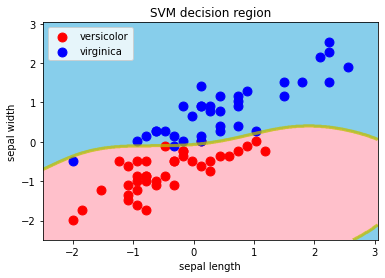

In [29]:
decision_region(x_train,y_train,
                SVC().fit(x_train,y_train),
                xlabel='sepal length',ylabel='sepal width', title='SVM decision region')

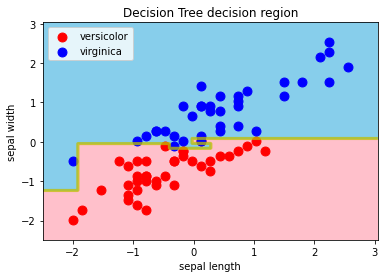

In [30]:
decision_region(x_train,y_train,
                DecisionTreeClassifier().fit(x_train,y_train),
                xlabel='sepal length',ylabel='sepal width',title='Decision Tree decision region')

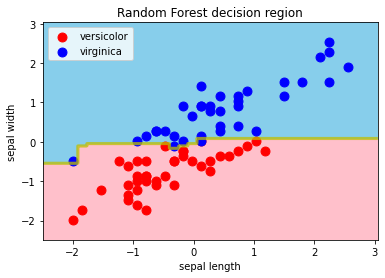

In [31]:
decision_region(x_train,y_train,
                RandomForestClassifier().fit(x_train,y_train),
                xlabel='sepal length',ylabel='sepal width', title='Random Forest decision region')

Some features can be spotted in the decision region of five methods:
 - **Nearest neighbor**: the cut does not follow any patterns. In other words, if we try to mathematically derive a function from a cut, it might be impossible. However, the cut clearly seperate the two sets of class labels.
 - **Logistic Regression**: the cut is a straight line which might be represented as a linear function. However, it can not clearly divide the set of input into two class labels.
 - **SVM**: the cut bears the shape of a curve. Like logistic regression, it can not clearly separate the input set.
 - **Random Forest and Decision Tree**: the decision boundary of these twos seems to be made up from several linear cut with different levels. It efficiently divides the input set. It can also spot out some outliers.

# Problem 9

In [35]:
# Splitting data again without preprocessing
X, y = data.iloc[:,0:2], data['Species']
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.25)
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()

In [36]:
# Make a table of the index values
scores = pd.DataFrame(columns=columns, data=[
    calculateScore(KNeighborsClassifier(),x_train, y_train, x_test, y_test),
    calculateScore(LogisticRegression(), x_train, y_train, x_test, y_test),
    calculateScore(SVC(), x_train, y_train, x_test, y_test),
    calculateScore(DecisionTreeClassifier(), x_train, y_train, x_test, y_test),
    calculateScore(RandomForestClassifier(), x_train, y_train, x_test, y_test)
],index=['Nearest neighbor','Logistic Regression','SVM','Decision Tree','Random Forest'])
print(scores[:])

                     Accuracy Score  Precision Score  Recall Score  F1 Score
Nearest neighbor               0.88         0.916667      0.846154  0.880000
Logistic Regression            0.88         0.857143      0.923077  0.888889
SVM                            0.84         0.846154      0.846154  0.846154
Decision Tree                  0.80         0.833333      0.769231  0.800000
Random Forest                  0.84         0.846154      0.846154  0.846154


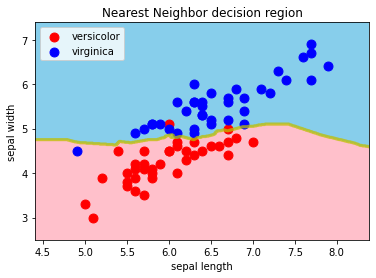

In [37]:
decision_region(x_train,y_train,
                KNeighborsClassifier().fit(x_train,y_train),
                xlabel='sepal length',ylabel='sepal width', title='Nearest Neighbor decision region')

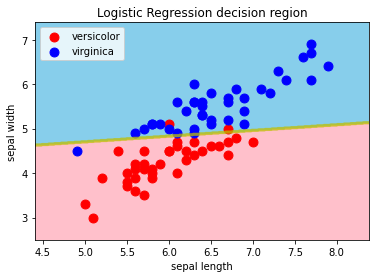

In [38]:
decision_region(x_train,y_train,
                LogisticRegression().fit(x_train,y_train),
                xlabel='sepal length',ylabel='sepal width', title='Logistic Regression decision region')

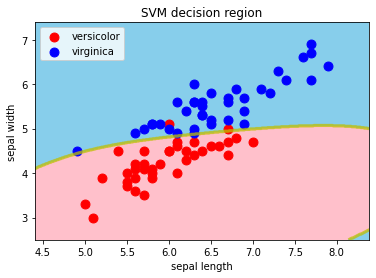

In [39]:
decision_region(x_train,y_train,
                SVC().fit(x_train,y_train),
                xlabel='sepal length',ylabel='sepal width', title='SVM decision region')

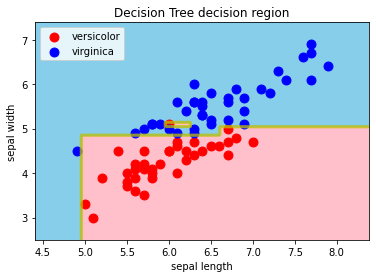

In [40]:
decision_region(x_train,y_train,
                DecisionTreeClassifier().fit(x_train,y_train),
                xlabel='sepal length',ylabel='sepal width',title='Decision Tree decision region')

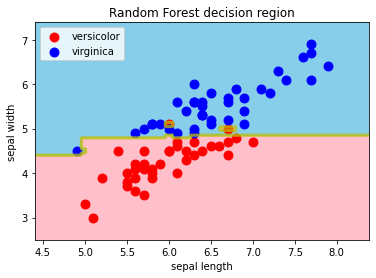

In [41]:
decision_region(x_train,y_train,
                RandomForestClassifier().fit(x_train,y_train),
                xlabel='sepal length',ylabel='sepal width', title='Random Forest decision region')

Standardization as a preprocessing technique facilitates the transformation of the datasets to a more like normal distribution with zero mean and unit variance. Without standardization steps, all of five methods perform less effective which can be seen as all the index values are lower than previous figures. Decision Tree and Random Forest are the most significantly affected methods. Their accuracy scores drop by around 10% as well as their precision score with approximately 15%.